# Detecting humorous reviews at Yelp

In this project we examine how to make models that can classify if a review is funny or not.
The actual [dataset](https://www.yelp.com/dataset_challenge) contains 4 million reviews by 1 million users for 144k businesses.

In the next section how a random sample from it with 10000 reviews looks like:


In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
os.chdir(nb_dir)

In [39]:
df_small = pd.read_csv('data/processed/yelp_subset.csv')
df_small.head()

,Unnamed: 0,funny,user_id,review_id,text,business_id,stars,date,useful,type,cool
0,1234684,0,KWY0QyEXEMGh6xCB5oMUzg,NdbkPVe_xrd8TFrggN6_xg,I always like the pizza. Service is usually g...,0PMKMyfX1j7Nc4esk1RaMg,4,2014-08-08,0,review,0
1,3188601,0,ZmFZlgHrs23eRZGA3LDKfQ,wRuvsAe2npOF6j4H5pB81g,"I liked the decor, but the place was fairly em...",X-_KD0nInfFQYa7MPZE3cQ,2,2013-01-02,1,review,0
2,2861441,3,0zZk826vbqYCx_yV8WGvtw,ZC2BIZcp7VqyP1JeiGC6_g,This chain is one of the better boba places I'...,IZivKqtHyz4-ts8KsnvMrA,4,2016-01-01,4,review,3
3,337096,0,jPVYZXiAeIUYS9rBhtiLZw,EVg_yqi7CTK46-haToEKzg,"Dear Mr. Giroux,\nYou have all of our family t...",wbuW38I-B6V8mbxrae2wiw,1,2014-07-14,0,review,0
4,3808496,0,29v2GjByL9e20myiBm0C3A,-xeRTRTD5158HODDMKxwAQ,Amazing service. Moer got to my house within 1...,NA-9WSNjAqJVzpgC29xURQ,5,2016-04-01,0,review,0


In [40]:
len(df_small)

10000

In [41]:
print('Number of funny videos:', len(df_small[df_small.funny == 1]))

Number of funny videos: 1141


In [42]:
print('Number of not funny videos:', len(df_small[df_small.funny == 0]))

Number of not funny videos: 8125


In [43]:
funny = df_small[df_small.funny == 1].text.dropna().to_string()

In [44]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=1200,
                      height=1000
                      ).generate(funny)

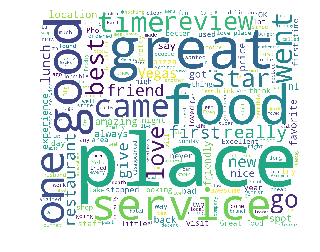

In [45]:
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [46]:
plt.imsave('wordcloud.png', wordcloud)

## Small and big datasets

The 'small' dataset is the one shown above with 10000 reviews in total drawn from the big one. We name `tag` the variable that shows if we speak about the `small` or `big` datasets

In [47]:
# Import the utilities we have
from yelp_ds import yelp_runner

## Making the datasets

In [54]:
tag = 'small'
cores = 6

In [50]:
yelp_runner.create_train_test_datasets(tag)

Train and test datasets in place.


## Create bag of words and tf-idf corpuses

### Bag-of-words (BOW model)
- In the bag of words model, each word is associated with an id
- Each document has as features all dictionary words and the weights are the number of occurrences in the document
- With logistic regression it achieves 76% accuracy for the small model and almost 79% for the full one
- It’s simple to implement but consumes lots of memory


### TF-IDF model

- Tf-idf is based on the idea of representing how important is a word to a document in a corpus
- Term frequency (tf) means we count the number of times the term appears in a document
- Inverse document frequency (idf) we multiply tf of a word by the inverse document frequency to distinguish how meaningful is a word for a document
- Simple but achieves  good results 79% - 80% accuracy in both small and big datasets


In [53]:
mm_corpus_bow, mm_corpus_tfidf = yelp_runner.create_bow_tfidf_corpuses(tag)

Dictionary exists, loading...
Bag of words corpus exists, loading...
Tf-Idf corpus exists, loading...


## Train Logistic Regression over bag-of-words and tf-idf

In [55]:
bow = yelp_runner.train_logistic_regression_bow(tag, cores)
tfidf = yelp_runner.train_logistic_regression_tfidf(tag, cores)


Dictionary exists, loading...
Bag of words corpus exists, loading...
Tf-Idf corpus exists, loading...
Logistic regression for bow exists, loading...
Dictionary exists, loading...
Bag of words corpus exists, loading...
Tf-Idf corpus exists, loading...
Logistic Regression model for tfidf exists, loading...


## Predictions and metrics for bow and tf-idf trained with Logistic Regression

In [57]:
p_metrics_bow, p_metrics_conf_matrix_bow, p_metrics_tfidf, p_metrics_conf_matrix_tfidf = yelp_runner.predict_bow_tfidf(tag)

Dictionary exists, loading...
Bag of words corpus exists, loading...
Tf-Idf corpus exists, loading...
Logistic regression for bow exists, loading...
Dictionary exists, loading...
Bag of words corpus exists, loading...
Tf-Idf corpus exists, loading...
Logistic Regression model for tfidf exists, loading...
Predictions exist, loading...
name: bow - accuracy: 0.7685
name: tfidf - accuracy: 0.8015


## Create doc2vec models

Doc2vec is an unsupervised algorithm to generate features for sentences/paragraphs/documents
- For sentence similarity it may perform well, however if there are many misspellings it might not be the ideal choice
- It is very memory efficient and if it is trained with tuned parameters it can perform very well
- In our dataset we try 3 different doc2vec models. 80% accuracy is achieved in both models


In [59]:
models = yelp_runner.create_and_train_models_d2vec(tag, cores)

Models exist, loading...


## Train Logistic Regression on doc2vec

Logistic Regression is a model we can use for dependent variables that are categories, here funny and not funny.

In [61]:
lrs = yelp_runner.train_logistic_regression_d2vec(tag, cores)

Models exist, loading...
Models exist, loading...
Train corpuses exist, loading...
Train corpuses exist, loading...
Train corpuses exist, loading...
Logistic Regression model exists, loading...
Logistic Regression model exists, loading...
Logistic Regression model exists, loading...


## Predictions and metrics for doc2vec

In [63]:
p_metrics_conf_matrix, p_metrics = yelp_runner.predictions_d2vec(tag)

Models exist, loading...
Test corpuses exist, loading...
Test corpuses exist, loading...
Test corpuses exist, loading...
Models exist, loading...
Models exist, loading...
Train corpuses exist, loading...
Train corpuses exist, loading...
Train corpuses exist, loading...
Logistic Regression model exists, loading...
Logistic Regression model exists, loading...
Logistic Regression model exists, loading...
Models exist, loading...
Predictions exist, loading...
name: Doc2Vec(dmc_d100_n5_w5_mc2_s0.001_t6) - accuracy: 0.788
Predictions exist, loading...
name: Doc2Vec(dbow_d100_n5_mc2_s0.001_t6) - accuracy: 0.802
Predictions exist, loading...
name: Doc2Vec(dmm_d100_n5_w10_mc2_s0.001_t6) - accuracy: 0.0065


## References

- https://www.yelp.com/dataset_challenge
- https://cs224d.stanford.edu/reports/OliveiraLuke.pdf
- https://radimrehurek.com/gensim/models/doc2vec.html
- https://cs.stanford.edu/~quocle/paragraph_vector.pdf
